In [2]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import lstm, time #helper libraries

Using TensorFlow backend.


In [3]:
#Step 1 Load Data
time_horizon = 5
# X_train, y_train, X_test, y_test = lstm.load_data('sp500.csv', 5, True)
# X_train, y_train, X_test, y_test = lstm.load_data('btc_open.csv', time_horizon, True) #YES!
# X_train, y_train, X_test, y_test = lstm.load_data('tsla_close.csv', time_horizon, True)
X_train, y_train, X_test, y_test = lstm.load_data('../../data/files/TWTR_open.csv', time_horizon, True)

In [4]:
#Step 2 Build Model
model = Sequential()

model.add(LSTM(
    input_dim=1,
    output_dim=100,
    return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
    100,
    return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(
    output_dim=1))
model.add(Activation('linear'))

start = time.time()
model.compile(loss='mse', optimizer='adam')
print('compilation time : ', time.time() - start)

compilation time :  0.021841764450073242


In [5]:
#Step 3 Train the model
model.fit(
    X_train,
    y_train,
    batch_size=512,
    nb_epoch=100,
    validation_split=0.20)

Train on 980 samples, validate on 245 samples
Epoch 1/100
980/980 [==============================] - 2s 2ms/step - loss: 0.0061 - val_loss: 0.0061
Epoch 2/100
980/980 [==============================] - 0s 145us/step - loss: 0.0058 - val_loss: 0.0055
Epoch 3/100
980/980 [==============================] - 0s 187us/step - loss: 0.0055 - val_loss: 0.0052
Epoch 4/100
980/980 [==============================] - 0s 168us/step - loss: 0.0051 - val_loss: 0.0049
Epoch 5/100
980/980 [==============================] - 0s 172us/step - loss: 0.0048 - val_loss: 0.0044
Epoch 6/100
980/980 [==============================] - 0s 162us/step - loss: 0.0044 - val_loss: 0.0041
Epoch 7/100
980/980 [==============================] - 0s 157us/step - loss: 0.0040 - val_loss: 0.0038
Epoch 8/100
980/980 [==============================] - 0s 170us/step - loss: 0.0037 - val_loss: 0.0034
Epoch 9/100
980/980 [==============================] - 0s 181us/step - loss: 0.0033 - val_loss: 0.0031
Epoch 10/100
980/980 [=======

980/980 [==============================] - 0s 168us/step - loss: 0.0012 - val_loss: 0.0018
Epoch 80/100
980/980 [==============================] - 0s 190us/step - loss: 0.0012 - val_loss: 0.0018
Epoch 81/100
980/980 [==============================] - 0s 145us/step - loss: 0.0012 - val_loss: 0.0017
Epoch 82/100
980/980 [==============================] - 0s 142us/step - loss: 0.0012 - val_loss: 0.0017
Epoch 83/100
980/980 [==============================] - 0s 141us/step - loss: 0.0012 - val_loss: 0.0017
Epoch 84/100
980/980 [==============================] - 0s 141us/step - loss: 0.0012 - val_loss: 0.0017
Epoch 85/100
980/980 [==============================] - 0s 145us/step - loss: 0.0012 - val_loss: 0.0017
Epoch 86/100
980/980 [==============================] - 0s 141us/step - loss: 0.0012 - val_loss: 0.0017
Epoch 87/100
980/980 [==============================] - 0s 142us/step - loss: 0.0012 - val_loss: 0.0017
Epoch 88/100
980/980 [==============================] - 0s 148us/step - loss:

27.2 27
yo


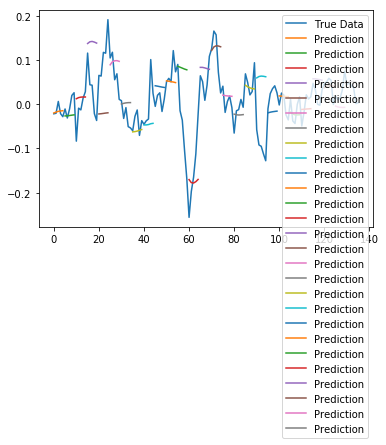

In [6]:
#Step 4 - Plot the predictions!
predictions = lstm.predict_sequences_multiple(model, X_test, time_horizon, time_horizon)
lstm.plot_results_multiple(predictions, y_test, time_horizon)

In [7]:
# model.save('good_model.h5')

# Making Prediction for next timestep

1.0 1
yo


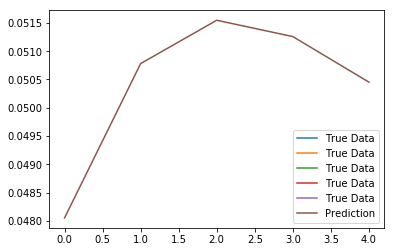

In [8]:
predictions_r = lstm.predict_sequences_multiple(model, X_test[-6:-1], time_horizon, time_horizon)
lstm.plot_results_multiple(predictions_r, predictions_r, time_horizon)